# Xử lý dữ liệu

In [92]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, GRU, Dense, Bidirectional
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Đọc dữ liệu
comments = []
labels = []
label_map = {"positive": 2, "neutral": 1, "negative": 0}
# Tạo danh sách từ khóa mở rộng
positive_keywords = [
    "great", "loved", "amazing", "fantastic", "masterpiece", "recommend", "excellent",
    "wonderful", "brilliant", "superb", "outstanding", "must read", "well written",
    "engaging", "thrilling", "page-turner", "enjoyed", "inspiring", "fascinating"
]

negative_keywords = [
    "boring", "disappointing", "didn't enjoy", "not my type", "too long", "not for me",
    "poorly written", "waste of time", "uninteresting", "predictable", "dull", "tedious",
    "annoying", "frustrating", "confusing", "bad", "horrible", "lackluster"
]

neutral_keywords = [
    "average", "okay", "not bad", "decent", "fine", "mediocre", "neutral", "could be better",
    "acceptable", "passable", "fair", "not the best", "nothing special", "typical", "meh"
]

# Đọc và phân loại bình luận
with open("../comments.txt", "r", encoding="utf-8") as f:
    for line in f:
        _, _, comment = line.strip().split(",", 2)
        comment_lower = comment.lower()

        # Phân loại theo từ khóa mở rộng
        if any(word in comment_lower for word in positive_keywords):
            labels.append(label_map["positive"])
        elif any(word in comment_lower for word in negative_keywords):
            labels.append(label_map["negative"])
        elif any(word in comment_lower for word in neutral_keywords):
            labels.append(label_map["neutral"])
        else:
            labels.append(label_map["neutral"])  # Mặc định nếu không khớp từ khóa nào

        comments.append(comment)

# Tokenization
max_words = 10000
max_len = 20
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(comments)
sequences = tokenizer.texts_to_sequences(comments)
X = pad_sequences(sequences, maxlen=max_len)
y = np.array(labels)

# Chia tập dữ liệu
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


# CNN

In [93]:
# Xây dựng mô hình CNN
def build_cnn():
    model = Sequential([
        Embedding(max_words, 128, input_length=max_len),
        Conv1D(64, 5, activation='relu'),
        MaxPooling1D(2),
        Flatten(),
        Dense(4, activation='relu'),
        Dense(3, activation='softmax')
    ])
    return model


# RNN

In [94]:
# Xây dựng mô hình RNN
def build_rnn():
    model = Sequential([
        Embedding(max_words, 128, input_length=max_len),
        GRU(100, return_sequences=True),
        GRU(100),
        Dense(4, activation='relu'),
        Dense(3, activation='softmax')
    ])
    return model


# LSTM

In [95]:
# Xây dựng mô hình LSTM
def build_lstm():
    model = Sequential([
        Embedding(max_words, 128, input_length=max_len),
        Bidirectional(LSTM(100, return_sequences=True)),
        Bidirectional(LSTM(100)),
        Dense(4, activation='relu'),
        Dense(3, activation='softmax')
    ])
    return model


# Train 

In [96]:
from tensorflow.keras.optimizers import Adam

In [97]:
# Huấn luyện và đánh giá tất cả mô hình
def train_and_evaluate(model, name):
    optimizer = Adam(learning_rate=0.0001)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test))
    y_pred = np.argmax(model.predict(X_test), axis=1)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    return history, mae, mse, rmse

models = {"CNN": build_cnn(), "RNN": build_rnn(), "LSTM": build_lstm()}
histories = {}
metrics = {}

for name, model in models.items():
    print(f"Training {name} model...")
    histories[name], mae, mse, rmse = train_and_evaluate(model, name)
    metrics[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse}


Training CNN model...
Epoch 1/5


c:\Users\PC\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.4062 - loss: 1.0921 - val_accuracy: 0.4169 - val_loss: 1.0765
Epoch 2/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4321 - loss: 1.0672 - val_accuracy: 0.4189 - val_loss: 1.0541
Epoch 3/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4475 - loss: 1.0412 - val_accuracy: 0.4964 - val_loss: 1.0089
Epoch 4/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5578 - loss: 0.9835 - val_accuracy: 0.7259 - val_loss: 0.9303
Epoch 5/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7572 - loss: 0.8923 - val_accuracy: 0.7596 - val_loss: 0.8133
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Training RNN model...
Epoch 1/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.4320 - loss: 1.0912 - val_accuracy: 0.4195 - val_loss: 1.0618
Epoch 2/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.4453 - loss: 1.0403 - val_accuracy: 0.6031 - val_loss: 0.9590
Epoch 3/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.6

In [98]:
print(metrics)

{'CNN': {'MAE': 0.4009170653907496, 'MSE': 0.72188995215311, 'RMSE': 0.8496410725436419}, 'RNN': {'MAE': 0.0735645933014354, 'MSE': 0.12938596491228072, 'RMSE': 0.3597026062072399}, 'LSTM': {'MAE': 0.31678628389154706, 'MSE': 0.5169457735247209, 'RMSE': 0.7189894112744087}}


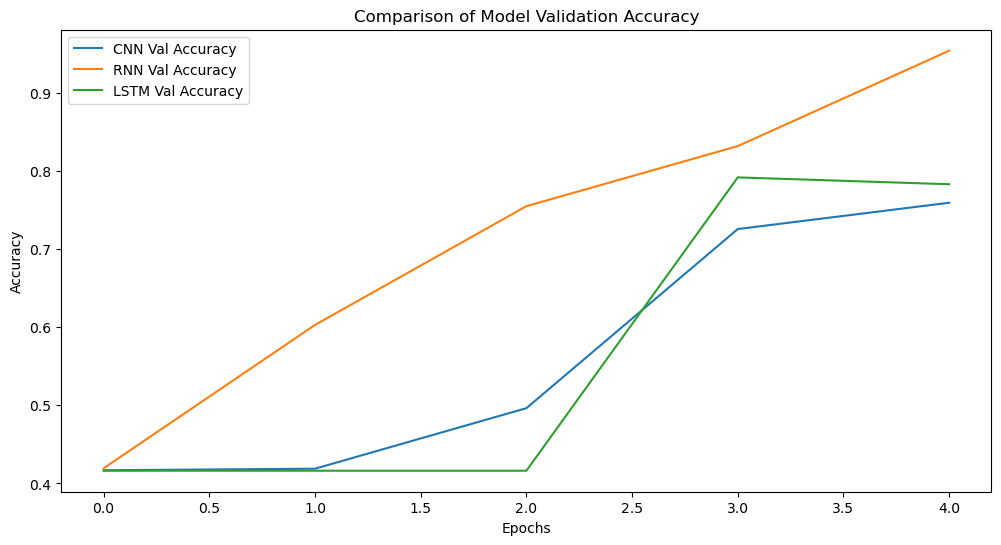

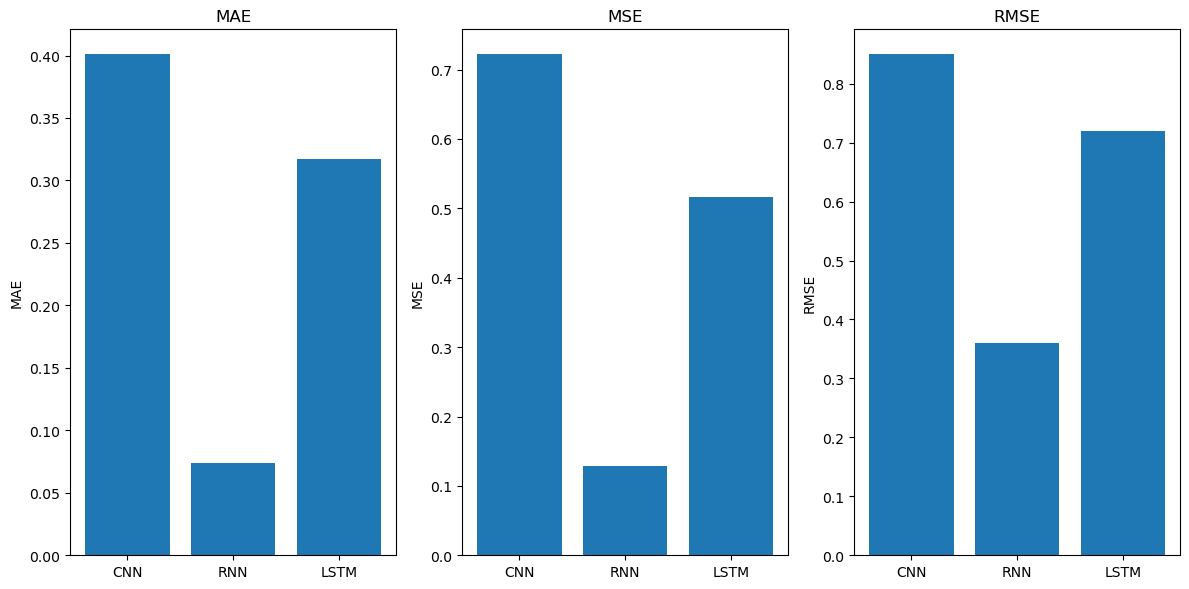

In [99]:
# Vẽ biểu đồ so sánh Accuracy
plt.figure(figsize=(12, 6))
for name, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=f'{name} Val Accuracy')
plt.title('Comparison of Model Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Vẽ biểu đồ MAE, MSE, RMSE
metric_names = ["MAE", "MSE", "RMSE"]
plt.figure(figsize=(12, 6))
for i, metric in enumerate(metric_names):
    plt.subplot(1, 3, i + 1)
    plt.bar(metrics.keys(), [metrics[model][metric] for model in metrics])
    plt.title(metric)
    plt.ylabel(metric)
plt.tight_layout()
plt.show()
